In [1]:
import holoviews as hv
import torch
import numpy as np
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import numpy as np
import sys
import panel as pn
pn.extension()
hv.extension('bokeh')

sys.path.append('../../..')
from pyeug import eug
sys.path.remove('../../..')

sys.path.append('../..')
from models.sage import SAGE, get_embeddings
from datasets import Nba
from util import preprocess_nba, train
sys.path.remove('../..')

nba = Nba()
g, adj, features, sens, sens_names, masks, labels, feat_names = preprocess_nba(nba)

# create SAGE model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
in_size = features.shape[1]
out_size = int(sum(labels.unique() != -1))
model = SAGE(in_size, 16, out_size).to(device)

# training

In [2]:
train(g, features, labels, masks, model, save_path='demo_nba_sage.pth')

Epochs:   1%|          | 13/2000 [00:01<02:51, 11.57it/s]

Epoch 00000 | Loss 1.0753 | Val Accuracy 0.4883 | Val F1 0.4608


Epochs:   6%|▌         | 112/2000 [00:02<00:19, 94.52it/s]

Epoch 00100 | Loss 0.6478 | Val Accuracy 0.7136 | Val F1 0.7045


Epochs:  11%|█         | 222/2000 [00:03<00:16, 105.93it/s]

Epoch 00200 | Loss 0.5453 | Val Accuracy 0.7089 | Val F1 0.7012


Epochs:  16%|█▌        | 322/2000 [00:04<00:15, 105.13it/s]

Epoch 00300 | Loss 0.6151 | Val Accuracy 0.7324 | Val F1 0.7323


Epochs:  21%|██        | 421/2000 [00:05<00:14, 106.18it/s]

Epoch 00400 | Loss 0.5846 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  26%|██▌       | 520/2000 [00:06<00:13, 105.84it/s]

Epoch 00500 | Loss 0.5785 | Val Accuracy 0.7183 | Val F1 0.7152


Epochs:  31%|███       | 619/2000 [00:07<00:13, 105.99it/s]

Epoch 00600 | Loss 0.5383 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  36%|███▌      | 718/2000 [00:08<00:11, 107.10it/s]

Epoch 00700 | Loss 0.5549 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  41%|████      | 817/2000 [00:09<00:10, 107.71it/s]

Epoch 00800 | Loss 0.5771 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  46%|████▌     | 916/2000 [00:10<00:10, 107.59it/s]

Epoch 00900 | Loss 0.5671 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  51%|█████     | 1015/2000 [00:10<00:09, 107.79it/s]

Epoch 01000 | Loss 0.5616 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  56%|█████▌    | 1114/2000 [00:11<00:08, 107.65it/s]

Epoch 01100 | Loss 0.5735 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  61%|██████    | 1213/2000 [00:12<00:07, 107.24it/s]

Epoch 01200 | Loss 0.6247 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  66%|██████▌   | 1312/2000 [00:13<00:06, 106.98it/s]

Epoch 01300 | Loss 0.5502 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  71%|███████   | 1422/2000 [00:14<00:05, 106.99it/s]

Epoch 01400 | Loss 0.5488 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  76%|███████▌  | 1521/2000 [00:15<00:04, 107.27it/s]

Epoch 01500 | Loss 0.5560 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  81%|████████  | 1616/2000 [00:16<00:03, 97.59it/s] 

Epoch 01600 | Loss 0.5856 | Val Accuracy 0.7230 | Val F1 0.7208
Early stopping triggered.


In [2]:
# load the model
model.load_state_dict(torch.load('demo_nba_sage.pth'))
model.eval()

SAGE(
  (layers): ModuleList(
    (0): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=94, out_features=16, bias=False)
    )
    (1): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=16, out_features=16, bias=False)
    )
  )
  (mlp): Linear(in_features=16, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

# fairness analysis

In [4]:
e = eug.EUG(model, adj, features, sens, sens_names, masks, labels, get_embeddings, feat_names=feat_names)
app = e.show()
server = pn.serve(app, port=45773)

/home/newdisk/xinwu/anaconda3/envs/holoviews_clone/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/home/newdisk/xinwu/anaconda3/envs/holoviews_clone/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
100%|██████████| 94/94 [00:00<00:00, 261.12it/s]


tensor([1.0000, 0.2159, 0.0581,  ..., 0.0790, 0.1917, 1.0000], device='cuda:0')
nnz 21242


100%|██████████| 1/1 [00:00<00:00, 2226.28it/s]


Launching server at http://localhost:45773


100%|██████████| 94/94 [00:03<00:00, 26.86it/s]


options: [None]


100%|██████████| 94/94 [00:03<00:00, 27.07it/s]


options: [None]


100%|██████████| 94/94 [00:03<00:00, 25.82it/s]


# train gcn

In [3]:
sys.path.append('../..')
from models.gcn import GCN
sys.path.remove('../..')

model_gcn = GCN(in_size, 16, out_size).to(device)

In [3]:
train(g, features, labels, masks, model_gcn, save_path='demo_nba_sage_gcn.pth')

Epochs:   0%|          | 10/2000 [00:01<02:59, 11.08it/s]

Epoch 00000 | Loss 0.7383 | Val Accuracy 0.5305 | Val F1 0.3777


Epochs:   6%|▌         | 117/2000 [00:02<00:23, 78.97it/s]

Epoch 00100 | Loss 0.5577 | Val Accuracy 0.6667 | Val F1 0.6668


Epochs:  11%|█         | 216/2000 [00:03<00:22, 81.09it/s]

Epoch 00200 | Loss 0.5257 | Val Accuracy 0.6901 | Val F1 0.6865


Epochs:  16%|█▌        | 315/2000 [00:04<00:20, 81.22it/s]

Epoch 00300 | Loss 0.5157 | Val Accuracy 0.6714 | Val F1 0.6651


Epochs:  21%|██        | 414/2000 [00:06<00:19, 80.95it/s]

Epoch 00400 | Loss 0.5270 | Val Accuracy 0.6901 | Val F1 0.6865


Epochs:  26%|██▌       | 512/2000 [00:07<00:18, 79.08it/s]

Epoch 00500 | Loss 0.5110 | Val Accuracy 0.6948 | Val F1 0.6921


Epochs:  30%|███       | 609/2000 [00:08<00:17, 79.48it/s]

Epoch 00600 | Loss 0.4956 | Val Accuracy 0.6901 | Val F1 0.6865


Epochs:  36%|███▌      | 712/2000 [00:09<00:16, 80.01it/s]

Epoch 00700 | Loss 0.5451 | Val Accuracy 0.6901 | Val F1 0.6865


Epochs:  40%|████      | 809/2000 [00:11<00:15, 79.09it/s]

Epoch 00800 | Loss 0.5316 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  46%|████▌     | 917/2000 [00:12<00:13, 79.25it/s]

Epoch 00900 | Loss 0.5214 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  51%|█████     | 1016/2000 [00:13<00:12, 79.49it/s]

Epoch 01000 | Loss 0.5165 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  56%|█████▌    | 1116/2000 [00:15<00:11, 79.61it/s]

Epoch 01100 | Loss 0.5174 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  61%|██████    | 1212/2000 [00:16<00:09, 79.74it/s]

Epoch 01200 | Loss 0.5216 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  65%|██████▌   | 1309/2000 [00:17<00:08, 81.32it/s]

Epoch 01300 | Loss 0.5228 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  71%|███████   | 1415/2000 [00:18<00:07, 80.20it/s]

Epoch 01400 | Loss 0.5276 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  76%|███████▌  | 1510/2000 [00:19<00:06, 79.75it/s]

Epoch 01500 | Loss 0.5240 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  81%|████████  | 1611/2000 [00:21<00:04, 78.78it/s]

Epoch 01600 | Loss 0.5184 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  86%|████████▌ | 1710/2000 [00:22<00:03, 82.15it/s]

Epoch 01700 | Loss 0.4962 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  91%|█████████ | 1814/2000 [00:23<00:02, 76.53it/s]

Epoch 01800 | Loss 0.5517 | Val Accuracy 0.6901 | Val F1 0.6871
Early stopping triggered.


In [4]:
# load the model
model_gcn.load_state_dict(torch.load('demo_nba_sage_gcn.pth'))
model_gcn.eval()

GCN(
  (layers): ModuleList(
    (0): GraphConv(in=94, out=16, normalization=both, activation=<function relu at 0x7f8c1d865300>)
    (1): GraphConv(in=16, out=16, normalization=both, activation=None)
  )
  (mlp): Linear(in_features=16, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [5]:
sys.path.append('../../..')
from pyeug.metrics import node_classification
from pyeug.util import concatenate_elements
sys.path.remove('../../..')

vectorized_concat = np.vectorize(concatenate_elements)
# Apply the vectorized function across columns
sens_current = vectorized_concat(*sens)

# gcn
with torch.no_grad():
    logits = model_gcn(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
gcn_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('gcn metrics:', gcn_metrics)

# sage
with torch.no_grad():
    logits = model(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
sage_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('sage metrics:', sage_metrics)

gcn metrics: [0.1786972845912046, 0.2899999999999999, 0.12333262188975354, 0.3548673548673549, 0.24666524377950708, 0.3548673548673549, 0.3330675142365067, 0.42916666666666664]
sage metrics: [0.18903086588685716, 0.2791666666666667, 0.16461521637876259, 0.5100759144237406, 0.32923043275752517, 0.5100759144237405, 0.4312609793949243, 0.6125]


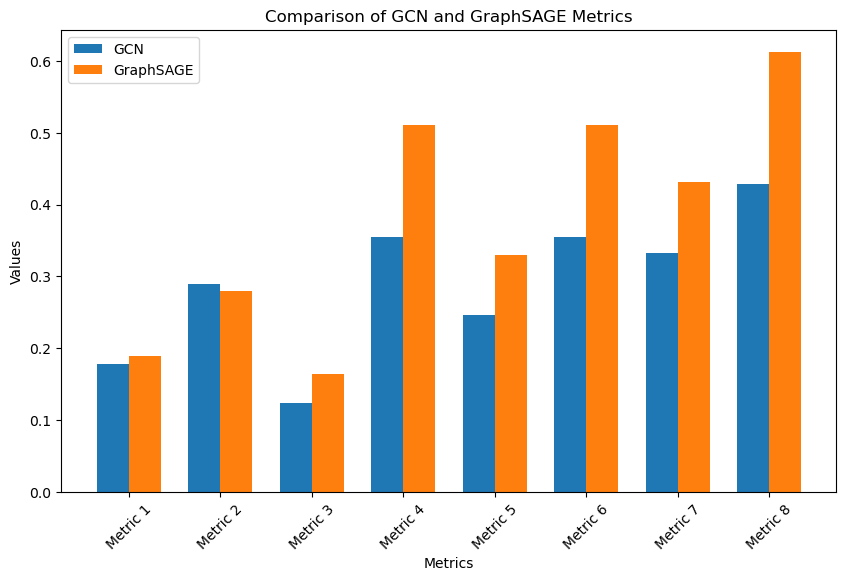

In [8]:
import matplotlib.pyplot as plt

# Labels for the metrics
labels = ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6', 'Metric 7', 'Metric 8']

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(labels))

bar1 = ax.bar(index, gcn_metrics, bar_width, label='GCN')
bar2 = ax.bar([p + bar_width for p in index], sage_metrics, bar_width, label='GraphSAGE')

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of GCN and GraphSAGE Metrics')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.show()


# data perturbation

In [5]:
records = e.get_records()

In [6]:
records

[{'Sens': ['Country', 'Age'],
  'Nodes': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
         130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
         143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
         156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,

In [5]:
import pickle

In [10]:
with open('demo_nba_sage_records.pkl', 'wb') as f:
    pickle.dump(records, f)

In [6]:
# Open the file in binary read mode
with open('demo_nba_sage_records.pkl', 'rb') as f:
    records = pickle.load(f)

In [7]:
records

[{'Sens': ['Country', 'Age'],
  'Nodes': array([  7,  15,  18,  52,  69,  80,  81, 100, 124, 170, 173, 188, 192,
         226, 281, 289, 308, 329, 331, 342, 349, 363, 367, 374, 383, 389]),
  'Edges': True,
  'Attributes': []},
 {'Sens': ['Country', 'Age'],
  'Nodes': array([  6,   7,   8,  13,  15,  17,  18,  24,  28,  38,  39,  41,  48,
          51,  57,  63,  66,  68,  71,  73,  80,  81,  82,  83,  84,  85,
          86,  87,  88,  95,  98, 100, 105, 106, 107, 109, 110, 112, 113,
         117, 120, 123, 124, 125, 129, 132, 138, 140, 142, 143, 145, 147,
         152, 153, 158, 159, 161, 163, 166, 167, 170, 171, 172, 173, 174,
         175, 177, 184, 189, 191, 193, 195, 198, 201, 207, 208, 209, 224,
         226, 228, 232, 235, 242, 245, 246, 249, 251, 253, 255, 257, 267,
         268, 270, 272, 275, 278, 281, 282, 283, 284, 286, 287, 288, 289,
         291, 292, 295, 296, 303, 304, 305, 308, 309, 311, 312, 317, 319,
         320, 321, 322, 323, 326, 328, 329, 335, 336, 339, 341, 342,

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feat = features
feat_clone = feat.clone().detach()
adj_clone = adj.clone().detach().to(device)

## attr perturbation

In [9]:
selected_nodes = records[1]['Nodes']
attr_indices = []
for attr in records[1]['Attributes']:
    attr_indices.append(feat_names.index(attr))
feat_mean = feat.mean(dim=tuple(range(feat.dim() - 1)))
row_indices = torch.tensor(selected_nodes)  
col_indices = torch.tensor(attr_indices) 
# Convert row and column indices to a meshgrid of indices
rows, cols = torch.meshgrid(row_indices, col_indices, indexing='ij')
# Use fancy indexing to set the specified elements to 1
feat_clone[rows, cols] = feat_mean[attr_indices] 

## structure perturbation

In [10]:
selected_nodes = records[0]['Nodes']
# Converting the rows_to_zero into a tensor
selected_nodes_tensor = torch.from_numpy(selected_nodes.astype(int)).to(device)

# Get the row indices and column indices separately from the adj tensor
indices = adj_clone.coalesce().indices()
row_indices = indices[0]
col_indices = indices[1]

# Mask to zero out the selected rows
row_mask = ~torch.isin(row_indices, selected_nodes_tensor)
col_mask = ~torch.isin(col_indices, selected_nodes_tensor)
mask = row_mask & col_mask

# Apply mask
new_row_indices = row_indices[mask]
new_col_indices = col_indices[mask]
# new_values = adj_clone.values()[mask]

# Determine which diagonal indices need to be added
needed_diagonals = selected_nodes_tensor
existing_diagonals = (new_row_indices == new_col_indices) & torch.isin(new_row_indices, needed_diagonals)
missing_diagonals = needed_diagonals[~torch.isin(needed_diagonals, new_row_indices[existing_diagonals])]

# Add missing diagonal elements
if missing_diagonals.numel() > 0:
    new_row_indices = torch.cat([new_row_indices, missing_diagonals])
    new_col_indices = torch.cat([new_col_indices, missing_diagonals])
    # new_values = torch.cat([new_values, torch.ones_like(missing_diagonals, dtype=torch.float32)])

g_new = dgl.heterograph({('node', 'edge', 'node'): (new_row_indices.cpu().numpy(), new_col_indices.cpu().numpy())}) 
g_new = g_new.int().to(feat.device)

## retrain

In [6]:
nba = Nba()
g, adj, features, sens, sens_names, masks, labels, feat_names = preprocess_nba(nba)

model_new = SAGE(in_size, 16, out_size).to(device)

In [19]:
train(g_new, feat_clone, labels, masks, model_new, save_path='demo_nba_sage_retrain.pth')

Epochs:   0%|          | 0/2000 [00:00<?, ?it/s]

Epochs:   1%|          | 24/2000 [00:00<00:16, 119.54it/s]

Epoch 00000 | Loss 0.7636 | Val Accuracy 0.4789 | Val F1 0.3101


Epochs:   6%|▌         | 114/2000 [00:00<00:16, 113.09it/s]

Epoch 00100 | Loss 0.6114 | Val Accuracy 0.6761 | Val F1 0.6646


Epochs:  11%|█         | 216/2000 [00:01<00:16, 107.55it/s]

Epoch 00200 | Loss 0.6371 | Val Accuracy 0.6854 | Val F1 0.6743


Epochs:  16%|█▌        | 315/2000 [00:02<00:15, 107.89it/s]

Epoch 00300 | Loss 0.6276 | Val Accuracy 0.6948 | Val F1 0.6924


Epochs:  21%|██        | 414/2000 [00:03<00:14, 107.60it/s]

Epoch 00400 | Loss 0.5993 | Val Accuracy 0.6901 | Val F1 0.6888


Epochs:  26%|██▌       | 513/2000 [00:04<00:13, 107.96it/s]

Epoch 00500 | Loss 0.5913 | Val Accuracy 0.6761 | Val F1 0.6756


Epochs:  31%|███       | 612/2000 [00:05<00:12, 108.15it/s]

Epoch 00600 | Loss 0.5895 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  36%|███▌      | 722/2000 [00:06<00:12, 105.74it/s]

Epoch 00700 | Loss 0.5703 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  41%|████      | 821/2000 [00:07<00:11, 106.28it/s]

Epoch 00800 | Loss 0.6163 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  46%|████▌     | 921/2000 [00:08<00:10, 106.23it/s]

Epoch 00900 | Loss 0.6154 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  51%|█████     | 1020/2000 [00:09<00:09, 106.09it/s]

Epoch 01000 | Loss 0.5835 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  56%|█████▌    | 1119/2000 [00:10<00:08, 106.51it/s]

Epoch 01100 | Loss 0.6169 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  61%|██████    | 1218/2000 [00:11<00:07, 104.06it/s]

Epoch 01200 | Loss 0.6039 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  66%|██████▌   | 1317/2000 [00:12<00:06, 105.48it/s]

Epoch 01300 | Loss 0.6134 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  71%|███████   | 1416/2000 [00:13<00:05, 105.10it/s]

Epoch 01400 | Loss 0.6055 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  76%|███████▌  | 1515/2000 [00:14<00:04, 104.58it/s]

Epoch 01500 | Loss 0.5981 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  81%|████████  | 1611/2000 [00:15<00:03, 106.86it/s]

Epoch 01600 | Loss 0.6239 | Val Accuracy 0.6808 | Val F1 0.6798
Early stopping triggered.


In [7]:
# load the model
model_new.load_state_dict(torch.load('demo_nba_sage_retrain.pth'))
model_new.eval()

SAGE(
  (layers): ModuleList(
    (0): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=94, out_features=16, bias=False)
    )
    (1): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=16, out_features=16, bias=False)
    )
  )
  (mlp): Linear(in_features=16, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [8]:
sys.path.append('../../..')
from pyeug.metrics import node_classification
from pyeug.util import concatenate_elements
sys.path.remove('../../..')

vectorized_concat = np.vectorize(concatenate_elements)
# Apply the vectorized function across columns
sens_current = vectorized_concat(*sens)

with torch.no_grad():
    logits = model_new(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
new_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('new metrics:', new_metrics)

new metrics: [0.18770154844545245, 0.22549019607843135, 0.13921341827181716, 0.4081696081696082, 0.2784268365436343, 0.4081696081696082, 0.36192745540595966, 0.5333333333333334]


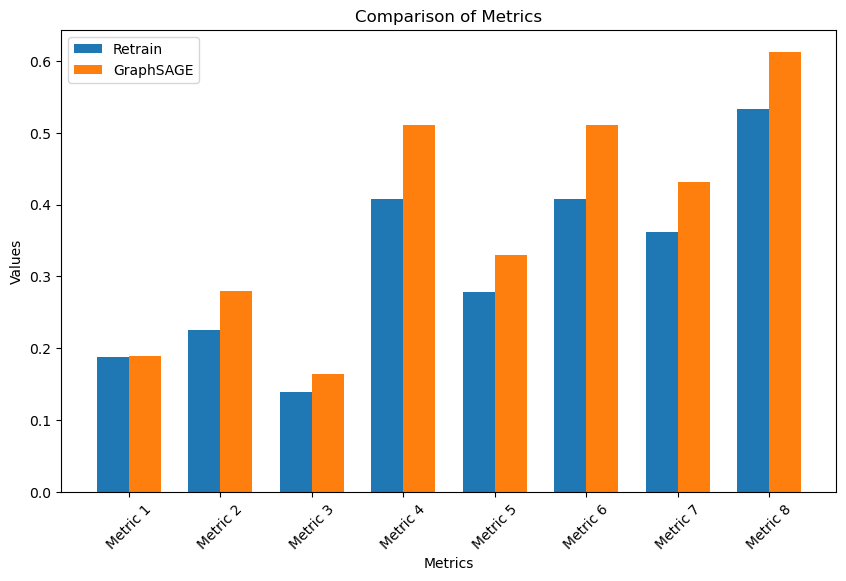

100%|██████████| 94/94 [00:03<00:00, 24.97it/s]


options: [None]


100%|██████████| 94/94 [00:03<00:00, 25.20it/s]


options: [None, '86, 0, 145, 71, 160, 249, 181, 178, 37, 68, 89, 38, 22, 215, 269, 322, 13, 370, 161, 120, 224, 64, 177, 364, 231, 32, 24, 25, 75, 242, 278, 94, 123, 287, 328, 12, 283, 88, 112, 373, 191, 169, 106, 327, 311, 358, 362, 401, 195, 110, 266, 214, 341, 397, 205, 243, 187, 166, 356, 235, 270, 310, 138, 388, 399, 257, 375, 400, 288, 343, 292, 147, 271, 333, 256, 313, 366, 221, 376, 393, 201, 390']


100%|██████████| 94/94 [00:03<00:00, 24.80it/s]


options: [None, '86, 0, 145, 71, 160, 249, 181, 178, 37, 68, 89, 38, 22, 215, 269, 322, 13, 370, 161, 120, 224, 64, 177, 364, 231, 32, 24, 25, 75, 242, 278, 94, 123, 287, 328, 12, 283, 88, 112, 373, 191, 169, 106, 327, 311, 358, 362, 401, 195, 110, 266, 214, 341, 397, 205, 243, 187, 166, 356, 235, 270, 310, 138, 388, 399, 257, 375, 400, 288, 343, 292, 147, 271, 333, 256, 313, 366, 221, 376, 393, 201, 390']


In [18]:
import matplotlib.pyplot as plt

# Labels for the metrics
lab = ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6', 'Metric 7', 'Metric 8']

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(lab))

bar1 = ax.bar(index, new_metrics, bar_width, label='Retrain')
bar2 = ax.bar([p + bar_width for p in index], sage_metrics, bar_width, label='GraphSAGE')

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(lab)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.show()


# compare

In [9]:
sys.path.append('../../..')
from pyeug.metrics import node_classification
from pyeug.util import concatenate_elements
sys.path.remove('../../..')

vectorized_concat = np.vectorize(concatenate_elements)
# Apply the vectorized function across columns
sens_current = vectorized_concat(*sens)

# sage
with torch.no_grad():
    logits = model(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
sage_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('sage metrics:', sage_metrics)

# gcn
with torch.no_grad():
    logits = model_gcn(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
gcn_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('gcn metrics:', gcn_metrics)

# retrained sage
with torch.no_grad():
    logits = model_new(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
sage_new_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('sage new metrics:', sage_new_metrics)

# # retrained gcn
# with torch.no_grad():
#     logits = model_gcn_new(g, features)
# predictions = torch.argmax(logits, dim=1).cpu().numpy()
# labels_np = labels.cpu().numpy()
# labeled_mask = labels_np != -1
# labeled_predictions = predictions[labeled_mask]
# labeled_labels = labels_np[labeled_mask]
# labeled_sens = sens_current[labeled_mask]
# gcn_new_metrics = [
#     node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
#     node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
#     node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
#     node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
#     node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
#     node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
#     node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
#     node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
# ]
# print('gcn new metrics:', gcn_new_metrics)

sage metrics: [0.18903086588685716, 0.2791666666666667, 0.16461521637876259, 0.5100759144237406, 0.32923043275752517, 0.5100759144237405, 0.4312609793949243, 0.6125]
gcn metrics: [0.1786972845912046, 0.2899999999999999, 0.12333262188975354, 0.3548673548673549, 0.24666524377950708, 0.3548673548673549, 0.3330675142365067, 0.42916666666666664]
sage new metrics: [0.18770154844545245, 0.22549019607843135, 0.13921341827181716, 0.4081696081696082, 0.2784268365436343, 0.4081696081696082, 0.36192745540595966, 0.5333333333333334]


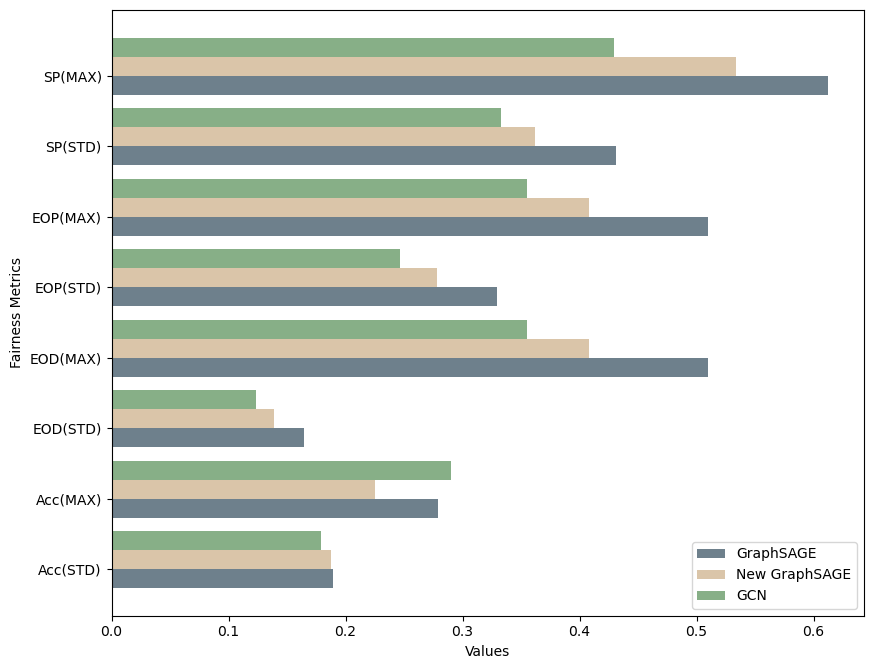

In [18]:
import matplotlib.pyplot as plt


# Labels for the metrics
labels = ['Acc(STD)', 'Acc(MAX)', 'EOD(STD)', 'EOD(MAX)', 'EOP(STD)', 'EOP(MAX)', 'SP(STD)', 'SP(MAX)']

# Creating the plot
fig, ax = plt.subplots(figsize=(8.84, 6.79))  # Adjusted figure height for more compactness
bar_width = 0.09
bar_spacing = 0.0  # Spacing between bars
index = range(len(labels))
index = list(map(lambda x: x / 3, index))  # Double the index to create space between the bars

bar1 = ax.barh(index, sage_metrics, bar_width, label='GraphSAGE', color='#6E808C')
bar2 = ax.barh([p + bar_width for p in index], sage_new_metrics, bar_width, label='New GraphSAGE', color='#DAC5A9')
bar3 = ax.barh([p + 2 * bar_width for p in index], gcn_metrics, bar_width, label='GCN', color='#87AF87')

# Adding labels, title, and legend
ax.set_ylabel('Fairness Metrics')
ax.set_xlabel('Values')
# ax.set_xticks([p + 1.5 * bar_width for p in index])
ax.set_yticks([p + (bar_width + bar_spacing) / 2 for p in index])
# ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.legend()

# Adjust the layout to be more compact
plt.tight_layout()

# Show the plot
plt.show()
